#  TMDB ( what makes a good movie?)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Dataset is taken from TMDB (The Movie Database) database which is a popular user editable database for movies and TV show in order to find out what makes a good, successful movie, every movie has some kind of recipe lets say it is a combination of (cast, budget, producer, director), budget is considered to be one of the important things in movie production so the question that comes into everyone's mind is how strong the relationship between budget and success



> or in a different way does spending more money on a movie increase its chance of success and make producers far away from the risk of losing their money (in case their movies got revenues lower than budget) this notebook is dedicated to answer such a question.






<blockquote>

but first we have to define what we mean by good/successful movie 

is it which have high revenue ??

or high user ratting ??

or from producer prospective which has high profit ??

answer to this particular question as we might see depends on one's prospective
but for the purpose of this notebook we will consider a movie successful if it has high revenue relative to thier budget



This turns us to the second question could we find movies with high profit but low user ratting ??  
and what portion of movies show this odd behavior

</blockquote>

<br>


In [ ]:
# For future me, this one for you
# you might wonder why I used ">" side by side with blockquote (they do the same thing)
# but let me first tell you when to use ">" 
# if lines have no space in between using ">" you wish to appear in the same block you can choose "<" or <blockqoute>
# if lines have space between and you wish to appear in the same block, <blockqoute> will be the right choice 

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

%matplotlib notebook

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [17]:
Mdata= pd.read_csv("tmdb-movies.csv")
Mdata.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Dataset contains movies produced between 1960 - 2015

In [18]:
np.sort( Mdata.release_year.unique() )

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

<a id='Movies produced each year before cleaning'></a>
### # Movies produced each year before cleaning

In [19]:
Mdata["release_year"].value_counts().sort_index(ascending=False)

2015    629
2014    700
2013    659
2012    588
2011    540
2010    490
2009    533
2008    496
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1997    192
1996    204
1995    175
1994    184
1993    178
1992    133
1991    133
1990    132
1989    137
1988    145
1987    125
1986    121
1985    109
1984    105
1983     80
1982     81
1981     82
1980     78
1979     57
1978     65
1977     57
1976     47
1975     44
1974     47
1973     55
1972     40
1971     55
1970     41
1969     31
1968     39
1967     40
1966     46
1965     35
1964     42
1963     34
1962     32
1961     31
1960     32
Name: release_year, dtype: int64

Lets find out how many missing values we have 

In [20]:
Mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [21]:
Mdata.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

This shows we got missing values in columns like cast,tagline,homepage,director,tagline,keywords,overview,genres and production_companies              


we have about 23 movies without geners specified


also 44 without director specified 

In [22]:
Mdata[Mdata["genres"].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


some movie seems to have mulitible classifications(genres) at the same time but some don't


so let's see what uniuqe genres we got  

In [23]:
Mgenres=[]

# iterate over genres series (null values are excluded)
for item in Mdata["genres"].dropna() :
    
    # split over pipe character
    Mgenres=Mgenres+item.split("|") 
    
    
    
Mgenres=list(dict.fromkeys(Mgenres))
Mgenres  

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

In [24]:
Mdata[Mdata.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [25]:
Mdata[Mdata["original_title"]=="TEKKEN"]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


about 5696 movie appere to have zero budget (value has not been recorded)

In [26]:
Mdata[Mdata["budget"]==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


here is another group (about 6016 movie) with zero revenues

In [27]:
Mdata[Mdata["revenue"]==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
103,292040,tt3321300,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,...,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0
116,297291,tt3086386,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,NaN,Mike Elliott,Action Adventure,...,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015,0.000000e+00,0.0




only about 3854 movie with non zero budget and revenue

In [28]:
Mdata[(Mdata["budget"] !=0) & (Mdata["revenue"] !=0)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [29]:
# select movies with zero budget or zero revenues
zero_revenue_budget=(Mdata["budget"] ==0) | (Mdata["revenue"]== 0)
Mdata[zero_revenue_budget].describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7011.000000,7011.000000,7.011000e+03,7.011000e+03,7011.000000,7011.000000,7011.000000,7011.000000,7.011000e+03,7.011000e+03
mean,80456.724005,0.346795,2.212212e+06,2.523892e+06,98.142205,46.814007,5.868835,2001.355299,2.878144e+06,4.261430e+06
std,100439.085168,0.318202,8.217805e+06,1.281855e+07,35.561799,76.798957,0.988007,13.582064,1.065639e+07,2.223438e+07
min,6.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,13735.500000,0.156884,0.000000e+00,0.000000e+00,88.000000,14.000000,5.300000,1994.000000,0.000000e+00,0.000000e+00
50%,28019.000000,0.277613,0.000000e+00,0.000000e+00,95.000000,22.000000,5.900000,2007.000000,0.000000e+00,0.000000e+00
75%,109977.500000,0.445057,0.000000e+00,0.000000e+00,106.000000,46.000000,6.500000,2012.000000,0.000000e+00,0.000000e+00
max,414419.000000,8.411577,1.500000e+08,2.536254e+08,900.000000,1329.000000,9.200000,2015.000000,1.500000e+08,4.559735e+08


50% of this group has ratting below 5.9

let's go deep to see if movies with zero budget or zero share similar properties

<IPython.core.display.Javascript object>


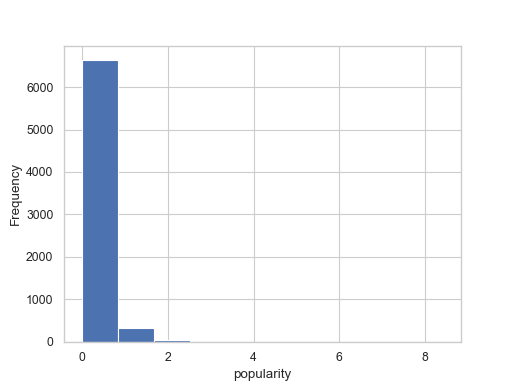

In [30]:
# create new figure
plt.figure()

ax = Mdata[zero_revenue_budget].popularity.plot(kind="hist")
ax.set_xlabel("popularity");

low popularity is thing in common between movies with zero revenues or zero budget

<IPython.core.display.Javascript object>


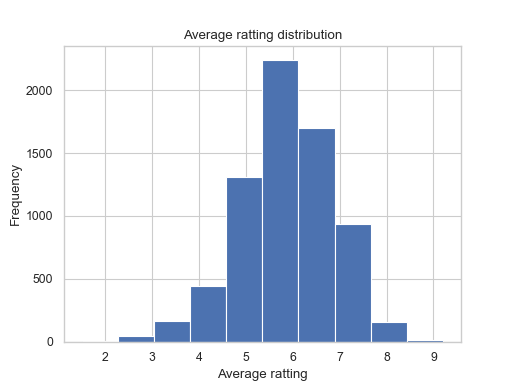

In [31]:
# create new figure
fig = plt.figure()

ax = Mdata[zero_revenue_budget].vote_average.plot(kind="hist");


# set y axis label
ax.set_xlabel("Average ratting");
# set title 
ax.set_title("Average ratting distribution");

the two final columns supposed to show the budget and revenue of the associated movie
in terms of 2010 dollars,accounting for inflation overtime but first i have to exclude movies with zero revenues or zero budget

In [32]:
Mdata = Mdata[(Mdata["budget"] !=0) & (Mdata["revenue"] !=0)].copy()
Mdata.shape[0]

3855

In [33]:
Mdata[Mdata["budget"] != Mdata["budget_adj"] ]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [34]:
release_year_bud = Mdata[Mdata["budget"] != Mdata["budget_adj"] ].release_year.unique()
np.sort(release_year_bud)

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)

movies produced before have budget_adj diffrent from budget


In [35]:
release_year_rev = Mdata[Mdata["revenue"] != Mdata["revenue_adj"] ].release_year.unique()
np.sort(release_year_rev)

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015],
      dtype=int64)

also have revenues diffrent from revenue_adj

lets check one more time to make sure we keep only movies with data recorded in right way  


In [36]:
Mdata[Mdata["budget"]<30000]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1354,985,tt0074486,0.331417,10000,7000000,Eraserhead,Jack Nance|Charlotte Stewart|Allen Joseph|Jean...,NaN,David Lynch,Where your nightmares end...,...,Henry Spencer tries to survive his industrial ...,89,Science Fiction|Fantasy|Horror|Drama,American Film Institute (AFI)|Libra Films,3/19/77,194,7.1,1977,35977.810326,2.518447e+07
1733,22717,tt1084972,0.278387,75,134,Wanted,Salman Khan|Ayesha Takia|Mahesh Manjrekar|Prak...,http://www.wanted-thefilm.com/,Prabhu Deva,"Mafia wants him DEAD !, Police wants him ALIVE !!",...,Radhe is a hardcore gangster. A sharpshooter w...,129,Action|Comedy|Crime|Thriller,Sahara One Motion Pictures,9/18/09,18,4.9,2009,76.230033,1.361977e+02
2398,39356,tt1560139,0.028456,3,43,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,http://www.boythemovie.co.nz,Taika Waititi,"Summer, Girls, Gangs, Drugs ... its not easy b...",...,"It's 1984, and Michael Jackson is king - even ...",87,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,2/14/10,26,7.3,2010,3.000000,4.300000e+01
2449,2667,tt0185937,0.934621,25000,248000000,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,http://www.blairwitch.com/,Daniel Myrick|Eduardo SÃ¡nchez,The scariest movie of all time is a true story.,...,In October of 1994 three student filmmakers di...,81,Horror|Mystery,Artisan Entertainment|Haxan Films,7/14/99,522,6.3,1999,32726.321165,3.246451e+08
2519,10397,tt0145653,0.352060,25,13,Angela's Ashes,Emily Watson|Robert Carlyle|Joe Breen|Michael ...,NaN,Alan Parker,NaN,...,Based on the best selling autobiography by Iri...,145,Drama,Paramount Pictures|Universal Pictures,12/25/99,24,7.0,1999,32.726321,1.701769e+01
2618,39964,tt0120836,0.090186,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,NaN,Jeff Pollack,A comedy about a guy who would do anything to ...,...,A comedy about finding your true love at any p...,95,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,4/23/99,14,4.8,1999,1.309053,1.309053e+02
3581,59296,tt1436559,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,http://www.ifcfilms.com/films/love-wedding-mar...,Dermot Mulroney,Here comes the ride.,...,A happy newlywed marriage counselor's views on...,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,6/3/11,55,5.3,2011,0.969398,1.335831e+03
3608,50217,tt0893412,0.463510,93,2500000,From Prada to Nada,Camilla Belle|Alexa PenaVega|April Bowlby|Wilm...,http://frompradatonadamovie.com/,Angel Gracia,A riches to rags story.,...,A whimsical fish-out-of-water story of two spo...,107,Comedy|Drama|Romance,Lewis Gilbert Productions|Lionsgate|Modern Vid...,1/28/11,47,5.2,2011,90.154018,2.423495e+06
3755,79120,tt1714210,0.243777,8000,469947,Weekend,Tom Cullen|Chris New|Jonathan Race|Laura Freem...,http://weekenderfilm.tumblr.com/,Andrew Haigh,A (sort of) love story between two guys over a...,...,After a drunken house party with his straight ...,96,Drama|Romance,EM Media|The Bureau|Glendale Picture Company|S...,9/22/11,96,7.4,2011,7755.184341,4.555657e+05
3785,58699,tt1242599,0.195283,17000,101236,Bellflower,Evan Glodell|Jessie Wiseman|Tyler Dawson|Rebek...,http://www.coatwolf.com/,Evan Glodell,A love story with apocalyptic stakes.,...,Two friends spend all their free time building...,106,Action|Drama|Romance,Coatwolf Productions,4/16/11,24,6.7,2011,16479.766724,9.813798e+04


31 movies appear to have incorrect values  
I have checked them myself and it turns out that thier stored values on dataset are inconsistent with thier actual budget and revenues 

<br>

### Data Cleaning (Make sure that data is in a good shape)

From previous stage some columns appered to be not helpful so i decided to drop them 
also some data like relase "release_date" not in datetime format and one duplicate value needs to be removed

In [37]:
Mdata.drop(["tagline","homepage","overview"],axis=1,inplace=True)
Mdata.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [38]:
Mdata["release_date"]=pd.to_datetime(Mdata["release_date"])

let's Check if it was changed proberly 

In [39]:
Mdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 18 columns):
id                      3855 non-null int64
imdb_id                 3855 non-null object
popularity              3855 non-null float64
budget                  3855 non-null int64
revenue                 3855 non-null int64
original_title          3855 non-null object
cast                    3851 non-null object
director                3854 non-null object
keywords                3717 non-null object
runtime                 3855 non-null int64
genres                  3855 non-null object
production_companies    3809 non-null object
release_date            3855 non-null datetime64[ns]
vote_count              3855 non-null int64
vote_average            3855 non-null float64
release_year            3855 non-null int64
budget_adj              3855 non-null float64
revenue_adj             3855 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(7)
memory usage: 572

now it is in the right format , now it's time to remove duplicate values

In [40]:
Mdata.drop_duplicates(inplace=True)

Dataset contains movies from 60's and 70's era , thier revenues  budget will appear to be small if compared to movies produced later due to the economic inflation so using the last two column which list all movies revenues and budget in terms of the value of usd in 2010 will be very helpful.

now all movies no matter how old /new they are got thier revenues and budget in the same unit , all values are represented in terms of the value of usd in 2010

In [41]:
Mdata.drop(["revenue","budget"],axis=1, inplace=True)

In [42]:
Mdata.rename(columns={"revenue_adj":"revenue","budget_adj":"budget"},inplace=True)

I decided to add another column to the dataset will make it easy for me to determine good/successful movie 

In [43]:
Mdata["revenue_to_budget"]=Mdata["revenue"]/ Mdata["budget"]

drop values that makes no sense

In [44]:
ind = Mdata[Mdata["budget"]<30000].index
ind

Int64Index([ 1733,  2398,  2519,  2618,  3581,  3608,  3755,  3785,  3853,
             3968,  4675,  5162,  5785,  5852,  6179,  7044,  7447,  7813,
             8125,  8235,  8944,  9992, 10050, 10236, 10297, 10495, 10777],
           dtype='int64')

In [45]:
ind = Mdata[Mdata["budget"]<30000].index
Mdata.drop(index=ind,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### what makes a good movie ??

Back to the main question we discussed earlier what contribute the most to movie succcess but now in more details 
and we will consider a movie successful if it has high revenue 

can we find a strong correlation between budget and revenues ?

In [46]:
Mdata.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,revenue_to_budget
count,3827.000000,3827.000000,3827.00000,3827.000000,3827.000000,3827.000000,3.827000e+03,3.827000e+03,3.827000e+03
mean,39871.391691,1.196867,109.27306,530.691403,6.169245,2001.264698,4.455210e+07,1.379143e+08,7.792476e+00
std,67310.808258,1.478742,19.86887,882.216980,0.795066,11.288023,4.481217e+07,2.165826e+08,1.617816e+02
min,5.000000,0.001117,26.00000,10.000000,2.200000,1960.000000,3.000000e+04,2.370705e+00,2.400000e-07
25%,6030.500000,0.465100,96.00000,72.000000,5.700000,1995.000000,1.337388e+07,1.885030e+07,8.721130e-01
50%,11286.000000,0.802711,106.00000,206.000000,6.200000,2004.000000,3.030653e+07,6.225050e+07,2.115385e+00
75%,38494.500000,1.379930,119.00000,582.000000,6.700000,2010.000000,6.076720e+07,1.646599e+08,4.190332e+00
max,417859.000000,32.985763,338.00000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,9.920000e+03


25 % of movies has revenues very close to their budget 
but as production companies increase budget it seems that difference between revenues and budget become significant  


<IPython.core.display.Javascript object>


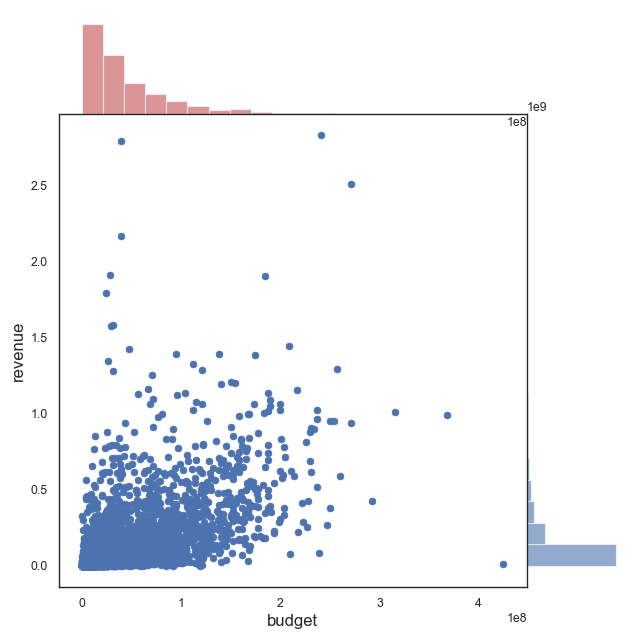

In [47]:
def plot_corrleation(Mdata):
    
    """
    plot_corrleation(arg)
    
    takes dataframe as an argument 
    
    creates JointGrid plot between budget and revenues
    sets title to the graph 
    changes label font size 
    
    """  

    sns.set(style="white") 
    
    # create JointGrid
    g = sns.JointGrid(x="budget",y="revenue",data=Mdata,space=0,height=8)
    
    # plot histogram on x axis margin
    g.ax_marg_x.hist(Mdata["budget"],bins=20,color="r",alpha=.6)
    
    
    # create scatter plot 
    g = g.plot_joint(sns.scatterplot,edgecolor="b")
     
    # plot histogram on y axis margin
    g.ax_marg_y.hist(Mdata["revenue"],bins=20,color="b",alpha=.6,orientation="horizontal")
    
    
    g.set_axis_labels("budget","revenue",fontsize=15)

    
    
plot_corrleation(Mdata)    

<IPython.core.display.Javascript object>


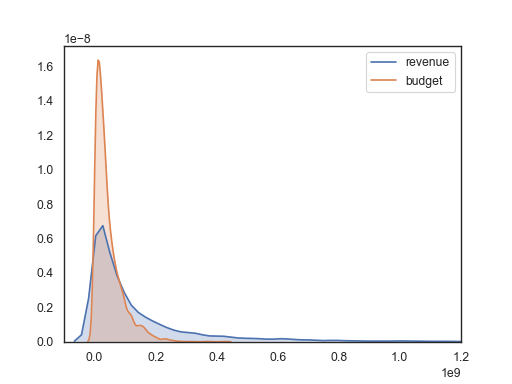

In [426]:
plt.figure()

ax = sns.kdeplot(Mdata["revenue"],label="revenue",shade=True);
sns.kdeplot(Mdata["budget"],label="budget",shade=True,ax=ax);

ax.set_xlim(-.1*(10**9),1.2*(10**9))
ax.legend();

I decided to divide movies into 3 groups

group1 from 30,000 to 10 million usd (low budget)


group2 above 10 million  to 60 million usd (mid range)


group3 above 60 million (high end)

### # Low budget group

In [48]:
group1 = Mdata[Mdata["budget"] <= 10*(10**6)]
group1.shape[0]

724

scatter plot of revenue_to_budget against budget will give us more details

<IPython.core.display.Javascript object>


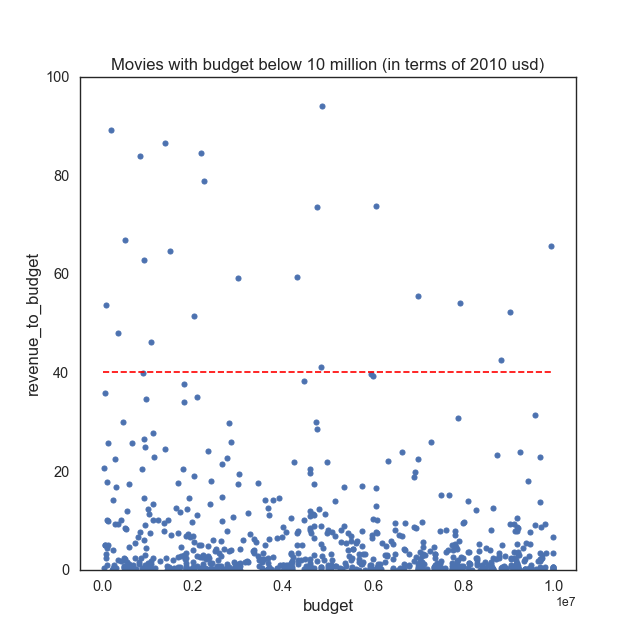

In [49]:
def plot_scatter(group,ylim,ylim_):
    
    """
    plot_scatter(group,ylim,ylim_)
    
    takes dataframe as and y axis limits  
    
    creates scatter plot between revenue_to_budget and budget
    plot horizontal line at 40      
    sets title to the graph 
    changes label font size 
    control limits of graph
    
    
    """  


    ax= group.plot(x="budget",y="revenue_to_budget",kind="scatter",figsize=(8,8),fontsize=13);

    # set title 
    ax.set_title("Movies with budget below 10 million (in terms of 2010 usd)",fontsize=15);
    
    

    # set x axis label 
    ax.set_xlabel("budget",fontsize=15)
    # set y axis label
    ax.set_ylabel("revenue_to_budget",fontsize=15)

    # turn off gridlines
    ax.grid([])
    
    ax.hlines(40,0,10**7,colors="red",linestyles="dashed")
    # set y axis limit 
    ax.set_ylim(ylim,ylim_);
    
    
    
plot_scatter(group1,0,100)

zooming in

<IPython.core.display.Javascript object>


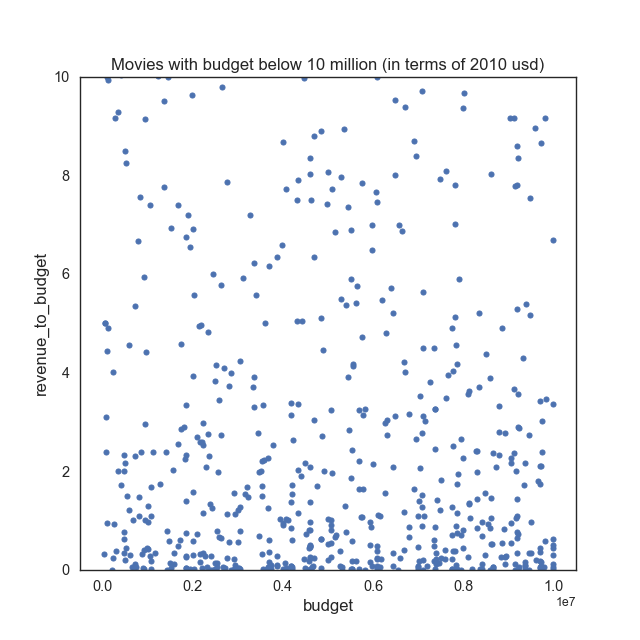

In [50]:
plot_scatter(group1,0,10) 

<IPython.core.display.Javascript object>


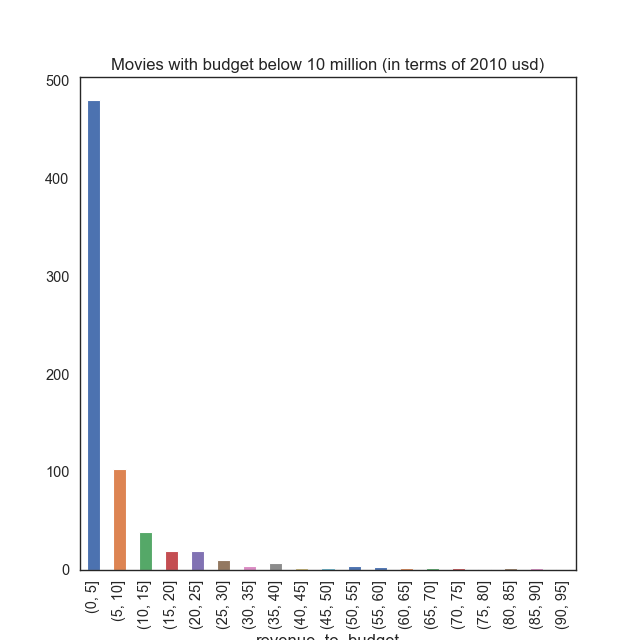

In [471]:
# create new figure 
fig = plt.figure()

# cut revenue_to_budget values into 20 intervals
bins= pd.cut( group1["revenue_to_budget"], np.arange(0,100, 5) )

ax = group1["revenue_to_budget"].groupby(bins).count().plot(kind="bar",figsize=(8,8),fontsize=13);

# set title 
ax.set_title("Movies with budget below 10 million (in terms of 2010 usd)",fontsize=15);

# turn off gridlines
ax.grid([])

# set x axis label 
ax.set_xlabel("revenue_to_budget",fontsize=15);

about 450 movie has thier revenue_to_budget ratio between 0 and 5 with few exceptions higher than 10

some movies are extraordinary enough to make high revenues even with low budget

In [51]:
group1[group1["revenue_to_budget"] < 1].shape[0]


260

about 260 out of 724 movie fall below one (production company lost money ) some of them bearly got very close to their budget



In [52]:
print( "ratio of movies with revenue_to_budget below one is {:.3} %".format((260/724)*100) )

ratio of movies with revenue_to_budget below one is 35.9 %


extraordinary movies

In [53]:
group1[group1["revenue_to_budget"] >= 40].shape[0]

44

### # Middle range group between 10 million - 60 million

In [54]:
group2 = Mdata[(Mdata["budget"] <= 60*(10**6) ) & (Mdata["budget"]> 10*(10**6) )]
group2.shape[0]

2128

<IPython.core.display.Javascript object>


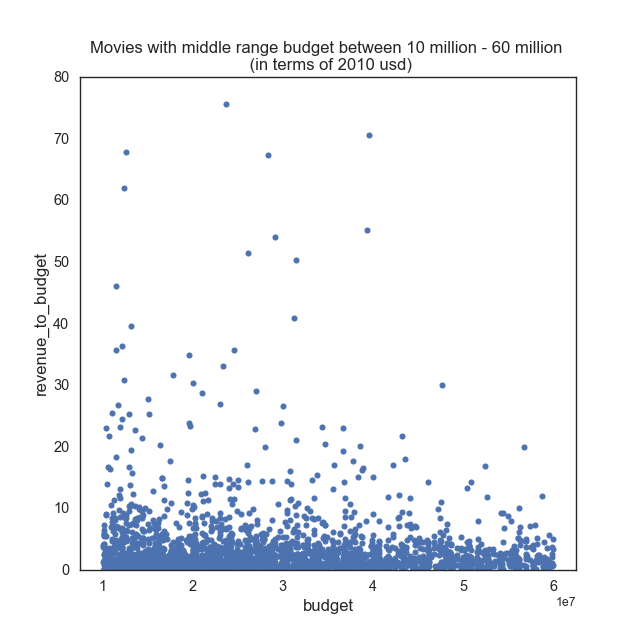

In [55]:
def plot_scatter_(group,ylim,ylim_):
    
    """
    plot_scatter_(group,ylim,ylim_)
    
    takes dataframe as and y axis limits  
    
    creates scatter plot between revenue_to_budget and budget
    sets title to the graph 
    changes label font size 
    control limits of graph
    
    """  



    ax= group.plot(x="budget",y="revenue_to_budget",kind="scatter",figsize=(8,8),fontsize=13);

    # set title 
    ax.set_title("Movies with middle range budget between 10 million - 60 million \n (in terms of 2010 usd)",fontsize=15);


    # set x axis label 
    ax.set_xlabel("budget",fontsize=15)
    # set y axis label
    ax.set_ylabel("revenue_to_budget",fontsize=15)

    # turn off gridlines
    ax.grid([])

    # set y axis limit 
    ax.set_ylim(ylim,ylim_);

    
    
    
plot_scatter_(group2,0,80)    

zooming in

<IPython.core.display.Javascript object>


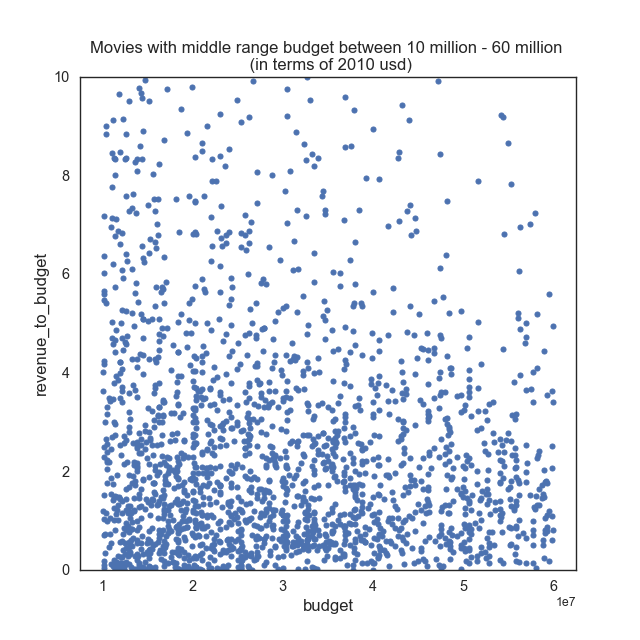

In [476]:
plot_scatter_(group2,0,10)   

In [56]:
group2[group2["revenue_to_budget"] < 1].shape[0]

607

607 out of 2128 movie fall between 10 million and 60 million usd

In [57]:
print( "ratio of movies with revenue_to_budget below one is {:.3} %".format((607/2128)*100) )

ratio of movies with revenue_to_budget below one is 28.5 %


### # High end group

In [58]:
group3 =  Mdata[Mdata["budget"] > 60*(10**6) ]
group3.shape[0]

975

<IPython.core.display.Javascript object>


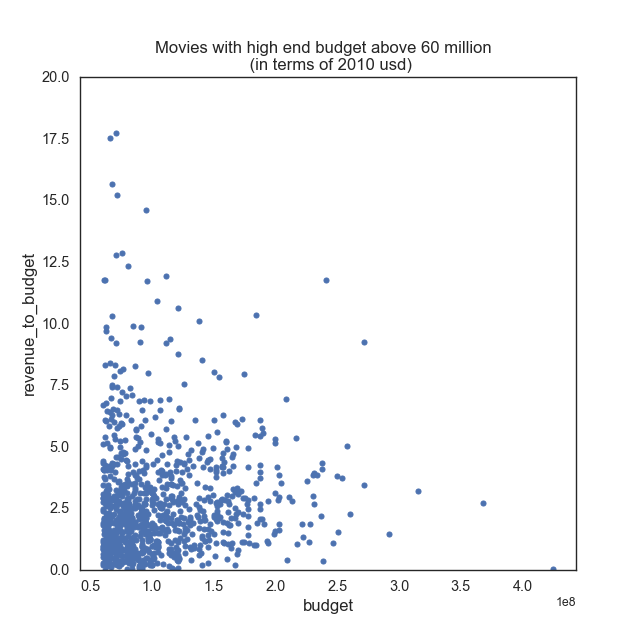

In [59]:
def plot_scatter__(group,ylim,ylim_):
    
    """
    plot_scatter__(group,ylim,ylim_)
    
    takes dataframe as an argument and y axis limits
    
    creates scatter plot between revenue_to_budget and budget
    sets title to the graph 
    changes label font size 
    control limits of graph
    
    """
    



    ax= group.plot(x="budget",y="revenue_to_budget",kind="scatter",figsize=(8,8),fontsize=13);

    # set title 
    ax.set_title("Movies with high end budget above 60 million  \n (in terms of 2010 usd)",fontsize=15);


    # set x axis label 
    ax.set_xlabel("budget",fontsize=15)
    # set y axis label
    ax.set_ylabel("revenue_to_budget",fontsize=15)

    # turn off gridlines
    ax.grid([])

    # set y axis limit 
    ax.set_ylim(ylim,ylim_);
    
    
    
plot_scatter__(group3,0,20)    

<IPython.core.display.Javascript object>


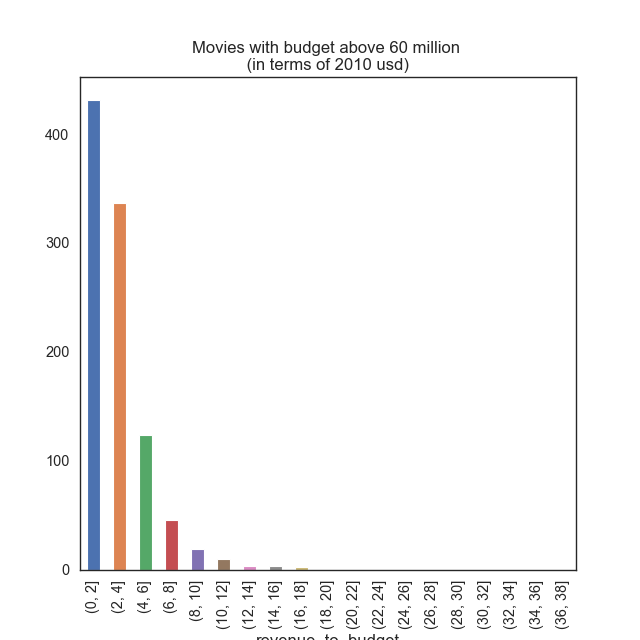

In [154]:
# create new figure 
fig = plt.figure()

# cut revenue_to_budget values into 20 intervals
bins= pd.cut( group3["revenue_to_budget"], np.arange(0,40, 2) )

ax = group3["revenue_to_budget"].groupby(bins).count().plot(kind="bar",figsize=(8,8),fontsize=13);

# set title 
ax.set_title("Movies with budget above 60 million \n (in terms of 2010 usd) ",fontsize=15);

# turn off gridlines
ax.grid([])

# set x axis label 
ax.set_xlabel("revenue_to_budget",fontsize=15);

In [60]:
group3[group3["revenue_to_budget"] < 1]

,id,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,revenue_to_budget
59,201088,tt2717822,2.550747,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,terrorist|technology|anti hero|hacker|computer...,133,Mystery|Crime|Action|Thriller|Drama,Universal Pictures|Forward Pass|Legendary Pict...,2015-01-13,584,5.0,2015,6.439997e+07,1.633270e+07,0.253613
66,205775,tt1390411,2.345821,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,suicide|ocean|sea|hunger|shipwreck,122,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,2015-11-20,805,6.4,2015,9.199996e+07,8.631506e+07,0.938208
73,266647,tt3332064,2.234573,Pan,Levi Miller|Garrett Hedlund|Hugh Jackman|Roone...,Joe Wright,flying|magic|fairy tale|peter pan|mermaid,111,Adventure|Family|Fantasy,Warner Bros.|Moving Picture Company (MPC)|Berl...,2015-09-24,586,5.9,2015,1.379999e+08,1.181172e+08,0.855922
722,76649,tt1921064,1.638781,Pompeii,Kit Harington|Carrie-Anne Moss|Emily Browning|...,Paul W.S. Anderson,gladiator|arena|gladiator fight|lava|roman,105,Action|Adventure|History|Romance|Drama,Impact Pictures|TriStar Pictures|Don Carmody P...,2014-02-18,837,5.1,2014,1.197418e+08,1.085337e+08,0.906397
896,188207,tt1043726,0.495840,The Legend of Hercules,Kellan Lutz|Liam McIntyre|Gaia Weiss|Scott Adk...,Renny Harlin,mythology|zeus|ancient greece|demigod|city of ...,99,Action|Adventure,Millennium Films,2014-01-10,399,4.4,2014,6.447637e+07,5.644395e+07,0.875421
1364,38985,tt0076740,0.219941,Sorcerer,Roy Scheider|Bruno Cremer|Francisco Rabal|Amid...,William Friedkin,dynamite|car journey|nicaragua|criminal|explos...,121,Action|Thriller|Adventure,Paramount Pictures|Universal Pictures|Film Pro...,1977-06-24,48,7.4,1977,7.915118e+07,4.317337e+07,0.545455
1498,18162,tt0457400,0.760048,Land of the Lost,Will Ferrell|Anna Friel|Danny McBride|Jorma Ta...,Brad Silberling,alien life-form|dinosaur|primate|duringcredits...,102,Adventure|Comedy|Science Fiction,Universal Pictures|Mosaic Media Group|Relativi...,2009-06-05,220,5.4,2009,1.016400e+08,6.981536e+07,0.686888
1516,26428,tt1186830,0.661609,Agora,Rachel Weisz|Max Minghella|Oscar Isaac|Ashraf ...,Alejandro AmenÃ¡bar,christianity|philosophy|egypt|new love|war,127,Adventure|Drama|History,HimenÃ³ptero|Telecinco Cinema|Mod Producciones...,2009-05-17,238,6.6,2009,7.114803e+07,3.968180e+07,0.557736
1531,20829,tt1201167,0.604388,Funny People,Adam Sandler|Seth Rogen|Leslie Mann|Eric Bana|...,Judd Apatow,comedian|cancer|bromance|stand up comedian,146,Comedy|Drama,Columbia Pictures|Universal Pictures|Happy Mad...,2009-07-31,213,5.5,2009,7.623003e+07,6.246694e+07,0.819453
1534,16577,tt0375568,0.595489,Astro Boy,Nicolas Cage|Kristen Bell|Bill Nighy|Donald Su...,David Bowers,superhero|title spoken by character,94,Animation|Action|Family|Science Fiction,The Weinstein Company|Summit Entertainment|Tez...,2009-10-15,284,6.0,2009,6.606603e+07,4.481418e+07,0.678324


202 out of 975 movie with budget above 60 million 

In [61]:
print( "ratio of movies with revenue_to_budget below one is {:.3} %".format((202/975)*100) )

ratio of movies with revenue_to_budget below one is 20.7 %


### Could we find movies with high profit but low user ratting ??

let's first select high revenue group
with revenues above 60 million usd

In [62]:
group = group3[group3["revenue"]>=60*(10**7) & (group3["revenue_to_budget"]>1) ]
group


,id,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,revenue_to_budget
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,10.090192
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.522909
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,2.683984
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,10.340891
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,7.927628
5,281957,tt1663202,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,3.947782
6,87101,tt1340138,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,2.842603
7,286217,tt3659388,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,5.512781
8,211672,tt2293640,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,15.631499
9,150540,tt2096673,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08,4.878335


<IPython.core.display.Javascript object>


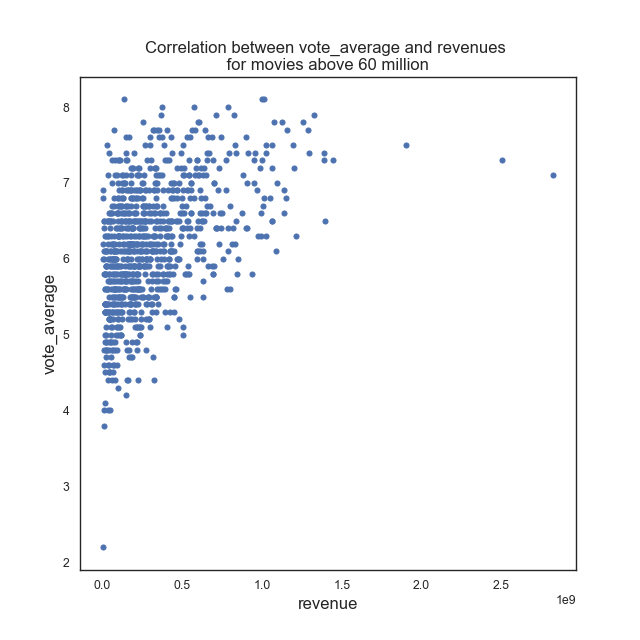

In [63]:
ax = group.plot(x="revenue",y="vote_average",kind="scatter",figsize=(8,8));

ax.set_title("Correlation between vote_average and revenues \n for movies above 60 million ", fontsize= 15 );

# set x axis label 
ax.set_xlabel("revenue",fontsize=15);
# set y axis label
ax.set_ylabel("vote_average",fontsize=15);

<IPython.core.display.Javascript object>


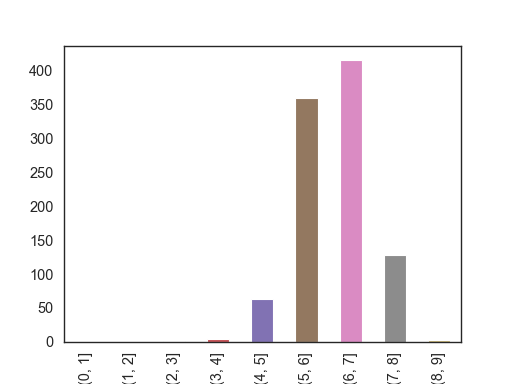

In [244]:
plt.figure()

bins= pd.cut(group["vote_average"], np.arange(0,10, 1) )

ax = group["vote_average"].groupby(bins).count().plot(kind="bar",fontsize=13);

# set x axis label 
ax.set_xlabel("vote_average",fontsize=15);

only few number of movies with low ratting between (3,4) (4,5) while most of them with ratting between (6,7) and (7,8) 


also few number with ratting above 8

<a id='conclusions'></a>
## Conclusions



### # Limitations

Analysis is done on 3827 out of 10866 movie from the original dataset, we got about 7011 movie with zero budget or zero revenues 
which reduced the size of dataset badly 

take a look at number of movies produced each year before and after reducing dataset size 



<a href="#Movies produced each year before cleaning"> Movies produced each year before cleaning </a> 

Here are Movies produced each year after reducing dataset size 

In [485]:
Mdata["release_year"].value_counts().sort_index(ascending=False)

2015    160
2014    165
2013    178
2012    157
2011    194
2010    177
2009    173
2008    167
2007    163
2006    169
2005    163
2004    146
2003    120
2002    126
2001    121
2000    106
1999    114
1998     92
1997     90
1996     86
1995     79
1994     62
1993     70
1992     53
1991     50
1990     51
1989     51
1988     57
1987     46
1986     47
1985     40
1984     42
1983     31
1982     25
1981     30
1980     23
1979     16
1978     16
1977     19
1976     15
1975      9
1974     13
1973     12
1972      8
1971     13
1970     11
1969      4
1968      9
1967     13
1966      5
1965      5
1964      7
1963      6
1962      7
1961     10
1960      5
Name: release_year, dtype: int64

it seems like we lost alot of information about movies produced before 2000 
it could be better if we got more information about old movies (70s,80s and 90s) to get the full picture 


concerning thier revenues my intuation tell me they could have diffrent behaviour 

low budget group of 70s,80s and 90s era in partiular has small chance of success compared to low budget group after 2000, as time pass more and more marketing channel appear to help producer in marketing and this gives them better chance of succes and get high revenues this could affect the results of low budget group 

So derived conclusions are limited to modern movies 


### # first 

The more production companies spend money on a movie the more likely to make high revenues but there still a few exceptions (movies with low budget but high revenues) 

the resk of lossing money appears to be decreasing as budget increase but not becoming zero which leave a space for risk 



### # second

Even production companies spend alot of money on a movies does not guarentee that this movie will have rattig above 8
but still have average ratting between 6 and 8